# BP 算法

$$
\nabla_w \mathcal{E}=\frac{\mathcal{E}}{w^{[1]}} + \cdots +\frac{\mathcal{E}}{w^{[N]}}
$$

$$
\frac{\mathcal{E}}{w^{[N]}}= f'({y^{[N-1]}}\cdot w^{[N]})*(d-y^{[N]})^T \cdot y^{[N]} = \mathcal{M}^{[N]} y^{[N]}
$$

$$
\frac{\mathcal{E}}{w^{[N-1]}}= f'({y^{[N-2]}}\cdot w^{[N-1]}) * w^{[N]}\cdot [f'({y^{[N-1]}}\cdot w^{[N]}) *(d-y^{[N]})^T] \cdot y^{[N-1]} = \mathcal{M}^{[N-1]} y^{[N-1]}
$$

$$
\mathcal{M}^{[N-1]}=f'(x)*[w^{[N]} \cdot \mathcal{M}^{[N-1]}]
$$

$$
*:\vec{x}*\vec{y}:=[x_1y_1,\cdots,x_ny_n]
$$

In [1]:
  def back_forward(self,dest):
        self.e[self.layer-1]=dest-self.y[self.layer-1]
        temp_delta=self.e[self.layer-1]*self.d_sigmoid_v[self.layer-1]
        temp_delta=np.reshape(temp_delta,[-1,1])
        self.dW[self.layer-2][:]=np.dot(np.reshape(self.y[self.layer-2],[-1,1]),np.transpose(temp_delta))
        self.db[self.layer-2][:]=np.transpose(temp_delta)
        #print(self.dW[self.layer-2])
        for itrn in range(self.layer-2,0,-1):
            sigma_temp_delta=np.dot(self.W[itrn],temp_delta)
            temp_delta=sigma_temp_delta*np.reshape(self.d_sigmoid_v[itrn],[-1,1])
            self.dW[itrn-1][:]=np.dot(np.reshape(self.y[itrn-1],[-1,1]),np.transpose(temp_delta))
            self.db[itrn-1][:]=np.transpose(temp_delta)

[array([[-17.1193724 , -14.47516142],
       [-16.86598427, -14.43655252]]), array([[-11.40527114],
       [  7.23376057]])]
[array([  6.9927864 ,  21.70111895]), array([-4.6453043])]


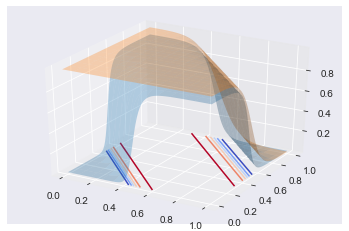

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 11 17:23:46 2017

@author: Cangye@hotmail.com
"""
%matplotlib inline
import numpy as np

class GenDataXOR():
    def __init__(self,shape):
        self.shape=shape
    def func(self,dt):
        if(dt[0] + dt[1] < 0.5):
            rt=[0.1]
        elif((dt[0] +dt[1])>1.5):
            rt=[0.1]
        else:
            rt=[0.9]
        return rt
    def GenVali(self):
        self.vali=np.array(list(map(self.func,self.data)))
        return self.vali
    def GenData(self):
        self.data=np.random.random(self.shape)
        return self.data


class BPAlg():
    def sigmoid(self,x):
        """
        Define active function sigomid
        """
        return 1/(1+np.exp(-x))
    def d_sigmiod(self,x):
        """
        Define df/dx
        """
        return np.exp(-x)/(1+np.exp(-x))**2
    def __init__(self,shape):
        """
        Initialize weights
        """
        self.shape=shape
        self.layer=len(shape)
        self.W = []
        self.b = []
        self.e = []
        self.y = []
        self.dW = []
        self.v = []
        self.db = []
        self.d_sigmoid_v = []
        for itrn in range(self.layer-1):
            self.W.append(np.random.random([shape[itrn], shape[itrn+1]]))
            self.dW.append(np.random.random([shape[itrn], shape[itrn+1]]))
            self.b.append(np.random.random([shape[itrn+1]]))
            self.db.append(np.random.random([shape[itrn+1]]))
        for itr in shape:
            self.e.append(np.random.random([itr]))
            self.y.append(np.random.random([itr]))
            self.v.append(np.random.random([itr]))
            self.d_sigmoid_v.append(np.ones([itr]))
    def forward(self, data):
        """
        forward propagation
        """
        self.y[0][:] = data
        temp_y = data
        for itrn in range(self.layer-1):
            temp_v = np.dot(temp_y, self.W[itrn])
            temp_vb = np.add(temp_v, self.b[itrn])
            temp_y = self.sigmoid(temp_vb)
            self.y[itrn+1][:] = temp_y
            self.d_sigmoid_v[itrn+1][:] = self.d_sigmiod(temp_vb)
        return self.y[-1]
    def back_forward(self, dest):
        """
        back propagation
        """
        self.e[self.layer-1] = dest-self.y[self.layer-1]
        temp_delta = self.e[self.layer-1]*self.d_sigmoid_v[self.layer-1]

        temp_delta = np.reshape(temp_delta,[-1,1])
        self.dW[self.layer-2][:] = np.dot(np.reshape(self.y[self.layer-2],[-1,1]),np.transpose(temp_delta))
        self.db[self.layer-2][:] = np.transpose(temp_delta)
        for itrn in range(self.layer-2, 0, -1):
            sigma_temp_delta = np.dot(self.W[itrn],temp_delta)
            temp_delta = sigma_temp_delta*np.reshape(self.d_sigmoid_v[itrn],[-1,1])
            self.dW[itrn-1][:] = np.dot(np.reshape(self.y[itrn-1], [-1,1]), np.transpose(temp_delta))
            self.db[itrn-1][:] = np.transpose(temp_delta)
    def data_feed(self, data, dest, eta):
        NDT = len(data)
        for itrn in range(NDT):
            self.forward(data[itrn])
            self.back_forward(dest[itrn])
            for itrn in range(self.layer-1):
                self.W[itrn][:] = self.W[itrn] + eta*self.dW[itrn]
                self.b[itrn][:] = self.b[itrn] + eta*self.db[itrn]
dt=GenDataXOR([30,2])
tsc=BPAlg([2,2,1])
for itrn in range(2000):
    data=dt.GenData()
    vali=dt.GenVali()
    tsc.data_feed(data,vali,2)
print(tsc.W)
print(tsc.b)
#print(tsc.forward(np.array([[1,1]])))   

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')
fig=plt.figure(1)
def sigmoid(rt):
    return 1/(1+np.exp(-rt))
def GenZ(X,Y):
    Z=np.zeros(np.shape(X))
    for ity in range(len(X)):
        for itx in range(len(X[0])):
            l1=tsc.forward([X[ity,itx],Y[ity,itx]])
            Z[ity,itx]=l1[0]
    return Z
def GenZ1(X,Y):
    Z=np.zeros(np.shape(X))
    for ity in range(len(X)):
        for itx in range(len(X[0])):
            l1=tsc.sigmoid(np.dot([X[ity,itx],Y[ity,itx]],tsc.W[0])+tsc.b[0])
            Z[ity,itx]=l1[1]
    return Z
x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
X,Y=np.meshgrid(x,y)
Z=GenZ(X,Y)
Z1=GenZ1(X,Y)
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,rstride=8,cstride=8, alpha=0.3)
ax.plot_surface(X,Y,Z1,rstride=8,cstride=8, alpha=0.3)
ax.contour(X,Y,Z,zdir='z',offset=0, cmap=plt.cm.coolwarm)
plt.show()
